In [242]:
import pandas as pd

shot_data = pd.read_csv('C:/Users/tyler/GaTech/ISYE6740/FinalProject/Data/NBA_2004_2023_Shots.csv')
game_data = pd.read_csv('C:/Users/tyler/GaTech/ISYE6740/FinalProject/Data/games.csv')

In [243]:
game_data = game_data.drop_duplicates(subset='GAME_ID', keep='first')

In [244]:
game_data['Score_Difference'] = abs(game_data['PTS_home'] - game_data['PTS_away'])

In [245]:
merged_data = shot_data.merge(game_data[['GAME_ID','Score_Difference','HOME_TEAM_ID']],how='left', on='GAME_ID')

In [246]:
merged_data['Home'] = merged_data['HOME_TEAM_ID'] == merged_data['TEAM_ID']

In [247]:
scoreless_games = merged_data[merged_data["Score_Difference"].isna()]["GAME_ID"].unique()
missing_games = game_data[game_data['GAME_ID'].isin(scoreless_games)]

In [248]:
merge_df = merged_data[~merged_data['GAME_ID'].isin(scoreless_games)]

#We only want 2017 and up
merge_df = merge_df[merge_df['SEASON_1']>=2017]

In [249]:
merge_df.loc[merge_df['PLAYER_NAME'] == 'O.G. Anunoby', 'POSITION'] = 'SF'
merge_df.loc[merge_df['PLAYER_NAME'] == 'OG Anunoby', 'POSITION'] = 'SF'
merge_df.loc[merge_df['PLAYER_NAME'] == 'O.G. Anunoby', 'POSITION_GROUP'] = 'F'
merge_df.loc[merge_df['PLAYER_NAME'] == 'OG Anunoby', 'POSITION_GROUP'] = 'F'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Jeff Dowtin Jr.', 'POSITION'] = 'PG'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Jeff Dowtin Jr.', 'POSITION_GROUP'] = 'G'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Jeff Dowtin', 'POSITION'] = 'PG'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Jeff Dowtin', 'POSITION_GROUP'] = 'G'
merge_df.loc[merge_df['PLAYER_NAME'] == 'John Butler Jr.', 'POSITION'] = 'PF'
merge_df.loc[merge_df['PLAYER_NAME'] == 'John Butler Jr.', 'POSITION_GROUP'] = 'F'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Chance Comanche', 'POSITION'] = 'C'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Chance Comanche', 'POSITION_GROUP'] = 'C'
merge_df.loc[merge_df['PLAYER_NAME'] == 'AJ Green', 'POSITION'] = 'SG'
merge_df.loc[merge_df['PLAYER_NAME'] == 'AJ Green', 'POSITION_GROUP'] = 'G'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Xavier Tillman', 'POSITION'] = 'C'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Xavier Tillman', 'POSITION_GROUP'] = 'C'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Xavier Tillman Sr.', 'POSITION'] = 'C'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Xavier Tillman Sr.', 'POSITION_GROUP'] = 'C'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Charlie Brown Jr.', 'POSITION'] = 'SG'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Charlie Brown Jr.', 'POSITION_GROUP'] = 'G'
merge_df.loc[merge_df['PLAYER_NAME'] == 'M.J. Walker', 'POSITION'] = 'SG'
merge_df.loc[merge_df['PLAYER_NAME'] == 'M.J. Walker', 'POSITION_GROUP'] = 'G'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Trevon Scott', 'POSITION'] = 'SF'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Trevon Scott', 'POSITION_GROUP'] = 'F'
merge_df.loc[merge_df['PLAYER_NAME'] == 'P.J. Dozier', 'POSITION'] = 'SG'
merge_df.loc[merge_df['PLAYER_NAME'] == 'P.J. Dozier', 'POSITION_GROUP'] = 'G'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Cam Reynolds', 'POSITION'] = 'SF'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Cam Reynolds', 'POSITION_GROUP'] = 'F'
merge_df.loc[merge_df['PLAYER_NAME'] == 'T.J. Leaf', 'POSITION'] = 'PF'
merge_df.loc[merge_df['PLAYER_NAME'] == 'T.J. Leaf', 'POSITION_GROUP'] = 'F'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Michael Frazier II', 'POSITION'] = 'SG'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Michael Frazier II', 'POSITION_GROUP'] = 'G'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Jeffery Taylor', 'POSITION'] = 'SF'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Jeffery Taylor', 'POSITION_GROUP'] = 'F'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Vitor Faverani', 'POSITION'] = 'C'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Vitor Faverani', 'POSITION_GROUP'] = 'C'

In [250]:
merge_df["TEAM_ID"].astype("object")
merge_df["PLAYER_ID"].astype("object")
merge_df["GAME_ID"].astype("object")
# merge_df["SEASON_1"] = pd.to_datetime(merge_df["SEASON_1"], format="%Y")
merge_df["GAME_DATE"] = pd.to_datetime(merge_df["GAME_DATE"])

In [251]:
merge_df["TIME_LEFT_QUARTER"] = merge_df["MINS_LEFT"] * 60 + merge_df["SECS_LEFT"]
merge_df["TIME_LEFT_GAME"] = (4 - merge_df["QUARTER"]) * 15 * 60 + merge_df["TIME_LEFT_QUARTER"]

In [252]:
merge_df.dtypes

SEASON_1                      int64
SEASON_2                     object
TEAM_ID                       int64
TEAM_NAME                    object
PLAYER_ID                     int64
PLAYER_NAME                  object
POSITION_GROUP               object
POSITION                     object
GAME_DATE            datetime64[ns]
GAME_ID                       int64
HOME_TEAM                    object
AWAY_TEAM                    object
EVENT_TYPE                   object
SHOT_MADE                      bool
ACTION_TYPE                  object
SHOT_TYPE                    object
BASIC_ZONE                   object
ZONE_NAME                    object
ZONE_ABB                     object
ZONE_RANGE                   object
LOC_X                       float64
LOC_Y                       float64
SHOT_DISTANCE                 int64
QUARTER                       int64
MINS_LEFT                     int64
SECS_LEFT                     int64
Score_Difference            float64
HOME_TEAM_ID                

In [253]:
#Make all overtime games have quarter of 5
merge_df.loc[merge_df['QUARTER'] == 6, 'QUARTER'] = 5
merge_df.loc[merge_df['QUARTER'] == 7, 'QUARTER'] = 5
merge_df.loc[merge_df['QUARTER'] == 8, 'QUARTER'] = 5
merge_df.loc[merge_df['QUARTER'] == 9, 'QUARTER'] = 5
merge_df.loc[merge_df['QUARTER'] == 10, 'QUARTER'] = 5
merge_df.loc[merge_df['QUARTER'] == 11, 'QUARTER'] = 5

In [254]:
from sklearn.model_selection import train_test_split

#we'll drop position from this initial model because it has so many variations that are rare that may mess up the model
basic_df = merge_df[merge_df['SEASON_1'] == 2023]
X = basic_df[['POSITION_GROUP', 'ACTION_TYPE','SHOT_TYPE','BASIC_ZONE','ZONE_NAME','LOC_X','LOC_Y','SHOT_DISTANCE','QUARTER','Score_Difference','Home','TIME_LEFT_QUARTER','TIME_LEFT_GAME']]
y = basic_df['SHOT_MADE']

#We have 4,000,000 data points for early model we'll make the dataset smaller for quicker/easier training before train-test split
#new_X, X_trash, new_y, y_trash = train_test_split(X, y, test_size=0.975, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [221]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

# Define the column transformer to apply one hot encoding only to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',  OneHotEncoder(), ['POSITION_GROUP', 'ACTION_TYPE','SHOT_TYPE','BASIC_ZONE','ZONE_NAME','QUARTER','Home'])
    ])

# Create a pipeline with one hot encoding and logistic regression (automatically uses ridge regression penalty)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the model on the training data
#model.fit(X_train, y_train)

# Make predictions on the test data
#y_pred = model.predict(X_test)

# Evaluate the model
#accuracy = accuracy_score(y_test, y_pred)
#print(f"Accuracy: {accuracy:.2f}")

In [222]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2', None],
    'classifier__solver': ['saga'],
    'classifier__max_iter': [100, 300, 500, 1000],
}


grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1,error_score='raise')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Use the best parameters to create the final model
final_model = grid_search.best_estimator_


Best Parameters: {'classifier__C': 0.1, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}


Best regularization technique was lasso.

In [232]:
lasso_coefficients = final_model.named_steps['classifier'].coef_
print(f'Lasso Coefficients: {lasso_coefficients}')

Lasso Coefficients: [[ 8.45219730e-02 -2.44644398e-04  0.00000000e+00  1.16631797e+00
   0.00000000e+00  1.69532001e+00  4.02883172e-01  1.22782832e-01
   0.00000000e+00  3.58841505e-01 -6.96441933e-02  7.65303870e-02
  -2.82231800e-01 -3.05327520e-01 -6.64848473e-01  0.00000000e+00
  -2.82870572e-01  1.00822592e+00  0.00000000e+00 -1.69216391e-01
   5.01605623e-02 -1.88703483e-01  0.00000000e+00 -1.89886413e-01
   0.00000000e+00 -1.43801559e-01 -6.28218156e-01 -1.19652267e-01
   7.95240341e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.16106634e+00  0.00000000e+00  1.60880762e+00  3.60467424e-01
   0.00000000e+00 -1.90509887e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -9.12520920e-02  6.77562843e-01
  -7.95932325e-01  0.00000000e+00  3.42171652e-01  0.00000000e+00
  -1.19101996e-01 -7.03659816e-02 -1.03415734e-01  2.23473922e-02
  -2.24664373e-01 -1.98566889e-01 -9.39022629e-01  0.00000000e+00
   0.00000000e+00 -1.53914070e-01  8.85076292e-01  0.000

In [237]:
# Assuming 'preprocessor' is the first step in your pipeline
preprocessor.fit(X_train)
transformed_feature_names = preprocessor.get_feature_names_out(input_features=X_train.columns)
coefficients_df = pd.DataFrame({'Feature': transformed_feature_names, 'Coefficient': lasso_coefficients[0]})
#Selected variables
coefficients_df[coefficients_df['Coefficient'] != 0]

,Feature,Coefficient
0,cat__POSITION_GROUP_C,0.084522
1,cat__POSITION_GROUP_F,-0.000245
3,cat__ACTION_TYPE_Alley Oop Dunk Shot,1.166318
5,cat__ACTION_TYPE_Cutting Dunk Shot,1.695320
6,cat__ACTION_TYPE_Cutting Finger Roll Layup Shot,0.402883
7,cat__ACTION_TYPE_Cutting Layup Shot,0.122783
9,cat__ACTION_TYPE_Driving Dunk Shot,0.358842
10,cat__ACTION_TYPE_Driving Finger Roll Layup Shot,-0.069644
11,cat__ACTION_TYPE_Driving Floating Bank Jump Shot,0.076530
12,cat__ACTION_TYPE_Driving Floating Jump Shot,-0.282232


In [238]:
y_pred = final_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6224617400107187


In [255]:
#Setup to do linear regression
import numpy as np

X['SHOT_VALUE'] = np.where(X['SHOT_TYPE']=='3PT Field Goal', y * 3, y * 2)
basic_df['SHOT_VALUE'] = np.where(basic_df['SHOT_TYPE']=='3PT Field Goal', basic_df['SHOT_MADE'] * 3, basic_df['SHOT_MADE'] * 2)
merge_df['SHOT_VALUE'] = np.where(merge_df['SHOT_TYPE']=='3PT Field Goal', merge_df['SHOT_MADE'] * 3, merge_df['SHOT_MADE'] * 2)

C:\Users\tyler\AppData\Local\Temp\ipykernel_20868\2724877213.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SHOT_VALUE'] = np.where(X['SHOT_TYPE']=='3PT Field Goal', y * 3, y * 2)
C:\Users\tyler\AppData\Local\Temp\ipykernel_20868\2724877213.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basic_df['SHOT_VALUE'] = np.where(basic_df['SHOT_TYPE']=='3PT Field Goal', basic_df['SHOT_MADE'] * 3, basic_df['SHOT_MADE'] * 2)


In [256]:
X_lin = X.iloc[:, :-1]
y_lin = X['SHOT_VALUE']

#We have almost 4,000,000 data points for early model we'll make the dataset smaller for quicker/easier training before train-test split
#new_X, X_trash, new_y, y_trash = train_test_split(X_lin, y_lin, test_size=0.975, random_state=42)
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

In [207]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression(n_jobs=-1))])


# Fit the model to the training data
model.fit(X_train_lin, y_train_lin)

# Make predictions on the test data
y_pred = model.predict(X_test_lin)

# Evaluate the model
mse = mean_squared_error(y_test_lin, y_pred)
r2 = r2_score(y_test_lin, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1.35
R-squared: 0.04


In [208]:
#Lasso
from sklearn.linear_model import Lasso

lasso_model = Lasso()

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', lasso_model)])


# Set up a parameter grid for grid search
param_grid = {
    'regressor__alpha': [0.01, 0.1, 1.0, 10.0]  # Add more values as needed
}

# Create a grid search object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train_lin, y_train_lin)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

lasso_coefficients = best_model.named_steps['regressor'].coef_
print(f'Lasso Coefficients: {lasso_coefficients}')

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_lin)

# Evaluate the best model
mse = mean_squared_error(y_test_lin, y_pred)
r2 = r2_score(y_test_lin, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Best Parameters: {'regressor__alpha': 0.01}
Best Negative Mean Squared Error: -1.3701518450846215
Lasso Coefficients: [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.66818466e-01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -9.45283239e-02  6.75704873e-12  0.0

In [209]:
# Assuming 'preprocessor' is the first step in your pipeline
transformed_feature_names = preprocessor.get_feature_names_out(input_features=X_train_lin.columns)
coefficients_df = pd.DataFrame({'Feature': transformed_feature_names, 'Coefficient': lasso_coefficients})
#Selected variables
coefficients_df[coefficients_df['Coefficient'] != 0]

,Feature,Coefficient
15,cat__ACTION_TYPE_Driving Layup Shot,-1.668185e-01
52,cat__SHOT_TYPE_2PT Field Goal,-9.452832e-02
53,cat__SHOT_TYPE_3PT Field Goal,6.757049e-12
56,cat__BASIC_ZONE_In The Paint (Non-RA),-1.503187e-02
58,cat__BASIC_ZONE_Mid-Range,-4.160106e-02
59,cat__BASIC_ZONE_Restricted Area,3.864299e-01


In [257]:
# Now we want to add the clutch, buzzer beater, and defensive rating of opponent category
merge_df['CLUTCH'] = np.where(merge_df['TIME_LEFT_GAME']<=120, True, False)
merge_df['BUZZER'] = np.where(merge_df['TIME_LEFT_QUARTER']<=5, True, False)

In [258]:
from nba_api.stats.endpoints import leaguedashteamstats

seasons = ['2003-04', '2004-05','2005-06', '2006-07','2007-08', '2008-09','2009-10', '2010-11','2011-12', '2012-13','2013-14', '2014-15','2015-16', '2016-17','2017-18', '2018-19','2019-20', '2020-21','2021-22', '2022-23']
season_type = 'Regular Season'  

list_stats = []
# Get advanced team statistics
for season in seasons:
    team_stats = leaguedashteamstats.LeagueDashTeamStats(
        season=season,
        season_type_all_star=season_type,
        measure_type_detailed_defense='Advanced',
    ).get_data_frames()[0]
    team_stats['SEASON_2'] = season
    list_stats.append(team_stats)

#concatenate the list together to a full dataframe
advanced_stats = pd.concat(list_stats, ignore_index=True)
# Display the DataFrame
advanced_stats

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,OFF_RATING_RANK,DEF_RATING_RANK,NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,PACE_RANK,PIE_RANK,SEASON_2
0,1610612737,Atlanta Hawks,82,28,54,0.341,3981.0,98.2,99.1,103.1,103.9,-4.9,-4.8,0.583,1.22,15.7,0.308,0.686,0.500,0.176,0.465,0.514,93.5,92.68,77.24,7680,0.466,1,25,25,25,4,24,24,26,24,27,24,19,13,17,24,18,17,10,25,2003-04
1,1610612738,Boston Celtics,82,36,46,0.439,3941.0,99.9,100.7,100.2,102.2,-0.3,-1.5,0.592,1.26,16.1,0.279,0.658,0.473,0.172,0.486,0.532,95.8,94.47,78.73,7757,0.490,1,20,20,20,28,16,17,19,18,23,21,28,26,28,23,5,4,3,19,2003-04
2,1610612741,Chicago Bulls,82,23,59,0.280,3966.0,93.9,95.6,100.5,102.1,-6.6,-6.5,0.641,1.36,16.7,0.311,0.679,0.491,0.172,0.446,0.486,94.8,93.23,77.69,7694,0.446,1,28,28,28,11,28,16,28,6,19,12,17,18,22,22,29,29,8,27,2003-04
3,1610612739,Cleveland Cavaliers,82,35,47,0.427,3971.0,98.4,100.6,101.3,103.1,-2.9,-2.6,0.619,1.49,16.9,0.340,0.688,0.514,0.160,0.451,0.498,93.6,91.71,76.43,7577,0.491,1,21,21,21,7,18,20,21,12,10,11,4,12,5,11,28,27,14,18,2003-04
4,1610612742,Dallas Mavericks,82,52,30,0.634,3961.0,109.6,110.4,104.3,105.9,5.3,4.5,0.591,1.96,17.7,0.335,0.686,0.507,0.128,0.495,0.536,95.7,94.62,78.85,7814,0.527,1,7,7,7,15,1,26,6,19,1,6,6,14,10,1,3,3,2,8,2003-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,1610612758,Sacramento Kings,82,48,34,0.585,3966.0,117.0,118.6,114.1,116.0,2.9,2.6,0.626,2.02,19.3,0.265,0.731,0.499,0.133,0.572,0.608,102.5,100.99,84.16,8343,0.511,1,7,7,7,12,1,24,8,7,2,3,23,6,17,6,2,1,12,11,2022-23
595,1610612759,San Antonio Spurs,82,22,60,0.268,3971.0,107.2,109.7,117.7,119.6,-10.5,-9.9,0.632,1.78,18.7,0.299,0.709,0.495,0.148,0.525,0.554,104.1,102.07,85.06,8451,0.452,1,28,28,28,8,29,30,30,6,18,8,7,24,21,24,26,28,2,29,2022-23
596,1610612761,Toronto Raptors,82,41,41,0.500,3961.0,112.2,114.6,111.4,113.1,0.8,1.5,0.571,2.05,17.2,0.316,0.721,0.502,0.118,0.517,0.555,99.6,97.85,81.54,8076,0.496,1,17,17,17,18,13,11,12,26,1,25,3,15,15,1,28,27,25,21,2022-23
597,1610612762,Utah Jazz,82,37,45,0.451,3961.0,112.7,115.3,113.8,116.0,-1.1,-0.7,0.611,1.69,18.2,0.308,0.711,0.512,0.151,0.547,0.584,103.1,101.02,84.18,8329,0.498,1,22,22,22,18,9,23,22,11,25,14,4,23,6,28,15,14,11,19,2022-23


In [259]:
advanced_stats.dtypes

TEAM_ID              int64
TEAM_NAME           object
GP                   int64
W                    int64
L                    int64
W_PCT              float64
MIN                float64
E_OFF_RATING       float64
OFF_RATING         float64
E_DEF_RATING       float64
DEF_RATING         float64
E_NET_RATING       float64
NET_RATING         float64
AST_PCT            float64
AST_TO             float64
AST_RATIO          float64
OREB_PCT           float64
DREB_PCT           float64
REB_PCT            float64
TM_TOV_PCT         float64
EFG_PCT            float64
TS_PCT             float64
E_PACE             float64
PACE               float64
PACE_PER40         float64
POSS                 int64
PIE                float64
GP_RANK              int64
W_RANK               int64
L_RANK               int64
W_PCT_RANK           int64
MIN_RANK             int64
OFF_RATING_RANK      int64
DEF_RATING_RANK      int64
NET_RATING_RANK      int64
AST_PCT_RANK         int64
AST_TO_RANK          int64
A

In [260]:
pd.set_option('display.max_columns', None)

# Display the DataFrame
display(advanced_stats)

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,OFF_RATING_RANK,DEF_RATING_RANK,NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,PACE_RANK,PIE_RANK,SEASON_2
0,1610612737,Atlanta Hawks,82,28,54,0.341,3981.0,98.2,99.1,103.1,103.9,-4.9,-4.8,0.583,1.22,15.7,0.308,0.686,0.500,0.176,0.465,0.514,93.5,92.68,77.24,7680,0.466,1,25,25,25,4,24,24,26,24,27,24,19,13,17,24,18,17,10,25,2003-04
1,1610612738,Boston Celtics,82,36,46,0.439,3941.0,99.9,100.7,100.2,102.2,-0.3,-1.5,0.592,1.26,16.1,0.279,0.658,0.473,0.172,0.486,0.532,95.8,94.47,78.73,7757,0.490,1,20,20,20,28,16,17,19,18,23,21,28,26,28,23,5,4,3,19,2003-04
2,1610612741,Chicago Bulls,82,23,59,0.280,3966.0,93.9,95.6,100.5,102.1,-6.6,-6.5,0.641,1.36,16.7,0.311,0.679,0.491,0.172,0.446,0.486,94.8,93.23,77.69,7694,0.446,1,28,28,28,11,28,16,28,6,19,12,17,18,22,22,29,29,8,27,2003-04
3,1610612739,Cleveland Cavaliers,82,35,47,0.427,3971.0,98.4,100.6,101.3,103.1,-2.9,-2.6,0.619,1.49,16.9,0.340,0.688,0.514,0.160,0.451,0.498,93.6,91.71,76.43,7577,0.491,1,21,21,21,7,18,20,21,12,10,11,4,12,5,11,28,27,14,18,2003-04
4,1610612742,Dallas Mavericks,82,52,30,0.634,3961.0,109.6,110.4,104.3,105.9,5.3,4.5,0.591,1.96,17.7,0.335,0.686,0.507,0.128,0.495,0.536,95.7,94.62,78.85,7814,0.527,1,7,7,7,15,1,26,6,19,1,6,6,14,10,1,3,3,2,8,2003-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,1610612758,Sacramento Kings,82,48,34,0.585,3966.0,117.0,118.6,114.1,116.0,2.9,2.6,0.626,2.02,19.3,0.265,0.731,0.499,0.133,0.572,0.608,102.5,100.99,84.16,8343,0.511,1,7,7,7,12,1,24,8,7,2,3,23,6,17,6,2,1,12,11,2022-23
595,1610612759,San Antonio Spurs,82,22,60,0.268,3971.0,107.2,109.7,117.7,119.6,-10.5,-9.9,0.632,1.78,18.7,0.299,0.709,0.495,0.148,0.525,0.554,104.1,102.07,85.06,8451,0.452,1,28,28,28,8,29,30,30,6,18,8,7,24,21,24,26,28,2,29,2022-23
596,1610612761,Toronto Raptors,82,41,41,0.500,3961.0,112.2,114.6,111.4,113.1,0.8,1.5,0.571,2.05,17.2,0.316,0.721,0.502,0.118,0.517,0.555,99.6,97.85,81.54,8076,0.496,1,17,17,17,18,13,11,12,26,1,25,3,15,15,1,28,27,25,21,2022-23
597,1610612762,Utah Jazz,82,37,45,0.451,3961.0,112.7,115.3,113.8,116.0,-1.1,-0.7,0.611,1.69,18.2,0.308,0.711,0.512,0.151,0.547,0.584,103.1,101.02,84.18,8329,0.498,1,22,22,22,18,9,23,22,11,25,14,4,23,6,28,15,14,11,19,2022-23


In [261]:
merge_df

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,HOME_TEAM,AWAY_TEAM,EVENT_TYPE,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,Score_Difference,HOME_TEAM_ID,Home,TIME_LEFT_QUARTER,TIME_LEFT_GAME,SHOT_VALUE,CLUTCH,BUZZER
0,2023,2022-23,1610612764,Washington Wizards,203078,Bradley Beal,G,SG,2022-10-19,22200004,IND,WAS,Made Shot,True,Jump Shot,3PT Field Goal,Left Corner 3,Left Side,L,24+ ft.,23.4,12.95,24,1,11,20,7.0,1.610613e+09,False,680,3380,3,False,False
1,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,2022-10-19,22200004,IND,WAS,Missed Shot,False,Step Back Jump shot,3PT Field Goal,Above the Break 3,Center,C,24+ ft.,-0.4,31.45,26,1,10,52,7.0,1.610613e+09,False,652,3352,0,False,False
2,2023,2022-23,1610612764,Washington Wizards,1628420,Monte Morris,G,PG,2022-10-19,22200004,IND,WAS,Made Shot,True,Running Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-1.3,5.25,1,1,10,39,7.0,1.610613e+09,False,639,3339,2,False,False
3,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,2022-10-19,22200004,IND,WAS,Made Shot,True,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-0.1,7.25,2,1,10,31,7.0,1.610613e+09,False,631,3331,2,False,False
4,2023,2022-23,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,2022-10-19,22200004,IND,WAS,Made Shot,True,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,1.8,7.15,2,1,10,5,7.0,1.610613e+09,False,605,3305,2,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454130,2017,2016-17,1610612757,Portland Trail Blazers,202329,Al-Farouq Aminu,F,PF,2016-10-25,21600002,POR,UTA,Made Shot,True,Jump Shot,3PT Field Goal,Left Corner 3,Left Side,L,24+ ft.,23.5,5.45,23,1,11,27,9.0,1.610613e+09,True,687,3387,3,False,False
1454131,2017,2016-17,1610612739,Cleveland Cavaliers,201567,Kevin Love,F,PF,2016-10-25,21600001,CLE,NYK,Missed Shot,False,Hook Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,1.1,8.85,3,1,11,26,29.0,1.610613e+09,True,686,3386,0,False,False
1454132,2017,2016-17,1610612762,Utah Jazz,203918,Rodney Hood,G,SG,2016-10-25,21600002,POR,UTA,Made Shot,True,Pullup Jump shot,2PT Field Goal,Mid-Range,Left Side Center,LC,16-24 ft.,13.5,18.85,19,1,11,44,9.0,1.610613e+09,False,704,3404,2,False,False
1454133,2017,2016-17,1610612759,San Antonio Spurs,200746,LaMarcus Aldridge,F,PF,2016-10-25,21600003,GSW,SAS,Missed Shot,False,Jump Shot,2PT Field Goal,Mid-Range,Center,C,16-24 ft.,-1.4,24.05,18,1,11,36,29.0,1.610613e+09,False,696,3396,0,False,False


In [262]:
#NBA Teams Abbreviation
Abbrev = pd.read_csv('C:/Users/tyler/GaTech/ISYE6740/FinalProject/Data/NBAAbbrev.csv')
#Add home full team name
merge_df = pd.merge(merge_df, Abbrev[['Abbreviation','Team Name']], left_on=['HOME_TEAM'], right_on=['Abbreviation'], how='left')
del merge_df['Abbreviation']
merge_df = merge_df.rename(columns={'Team Name': 'HOME_FULL'})

#Add away full team name
merge_df = pd.merge(merge_df, Abbrev[['Abbreviation','Team Name']], left_on=['AWAY_TEAM'], right_on=['Abbreviation'], how='left')
del merge_df['Abbreviation']
merge_df = merge_df.rename(columns={'Team Name': 'AWAY_FULL'})

merge_df

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,HOME_TEAM,AWAY_TEAM,EVENT_TYPE,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,Score_Difference,HOME_TEAM_ID,Home,TIME_LEFT_QUARTER,TIME_LEFT_GAME,SHOT_VALUE,CLUTCH,BUZZER,HOME_FULL,AWAY_FULL
0,2023,2022-23,1610612764,Washington Wizards,203078,Bradley Beal,G,SG,2022-10-19,22200004,IND,WAS,Made Shot,True,Jump Shot,3PT Field Goal,Left Corner 3,Left Side,L,24+ ft.,23.4,12.95,24,1,11,20,7.0,1.610613e+09,False,680,3380,3,False,False,Indiana Pacers,Washington Wizards
1,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,2022-10-19,22200004,IND,WAS,Missed Shot,False,Step Back Jump shot,3PT Field Goal,Above the Break 3,Center,C,24+ ft.,-0.4,31.45,26,1,10,52,7.0,1.610613e+09,False,652,3352,0,False,False,Indiana Pacers,Washington Wizards
2,2023,2022-23,1610612764,Washington Wizards,1628420,Monte Morris,G,PG,2022-10-19,22200004,IND,WAS,Made Shot,True,Running Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-1.3,5.25,1,1,10,39,7.0,1.610613e+09,False,639,3339,2,False,False,Indiana Pacers,Washington Wizards
3,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,2022-10-19,22200004,IND,WAS,Made Shot,True,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-0.1,7.25,2,1,10,31,7.0,1.610613e+09,False,631,3331,2,False,False,Indiana Pacers,Washington Wizards
4,2023,2022-23,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,2022-10-19,22200004,IND,WAS,Made Shot,True,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,1.8,7.15,2,1,10,5,7.0,1.610613e+09,False,605,3305,2,False,False,Indiana Pacers,Washington Wizards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319998,2017,2016-17,1610612757,Portland Trail Blazers,202329,Al-Farouq Aminu,F,PF,2016-10-25,21600002,POR,UTA,Made Shot,True,Jump Shot,3PT Field Goal,Left Corner 3,Left Side,L,24+ ft.,23.5,5.45,23,1,11,27,9.0,1.610613e+09,True,687,3387,3,False,False,Portland Trail Blazers,Utah Jazz
1319999,2017,2016-17,1610612739,Cleveland Cavaliers,201567,Kevin Love,F,PF,2016-10-25,21600001,CLE,NYK,Missed Shot,False,Hook Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,1.1,8.85,3,1,11,26,29.0,1.610613e+09,True,686,3386,0,False,False,Cleveland Cavaliers,New York Knicks
1320000,2017,2016-17,1610612762,Utah Jazz,203918,Rodney Hood,G,SG,2016-10-25,21600002,POR,UTA,Made Shot,True,Pullup Jump shot,2PT Field Goal,Mid-Range,Left Side Center,LC,16-24 ft.,13.5,18.85,19,1,11,44,9.0,1.610613e+09,False,704,3404,2,False,False,Portland Trail Blazers,Utah Jazz
1320001,2017,2016-17,1610612759,San Antonio Spurs,200746,LaMarcus Aldridge,F,PF,2016-10-25,21600003,GSW,SAS,Missed Shot,False,Jump Shot,2PT Field Goal,Mid-Range,Center,C,16-24 ft.,-1.4,24.05,18,1,11,36,29.0,1.610613e+09,False,696,3396,0,False,False,Golden State Warriors,San Antonio Spurs


In [263]:
advanced_stats['TEAM_NAME'] = np.where(advanced_stats['TEAM_NAME']=='LA Clippers', 'Los Angeles Clippers', advanced_stats['TEAM_NAME'])

condition1 = (merge_df['HOME_TEAM']=='CHA') & (merge_df['SEASON_2']<'2014-15')
condition2 = (merge_df['AWAY_TEAM']=='CHA') & (merge_df['SEASON_2']<'2014-15')
merge_df.loc[condition1, 'HOME_FULL'] = 'Charlotte Bobcats'
merge_df.loc[condition2, 'AWAY_FULL'] = 'Charlotte Bobcats'

merge_df['OPPONENT'] = np.where(merge_df['TEAM_NAME']==merge_df['HOME_FULL'], merge_df['AWAY_FULL'], merge_df['HOME_FULL'])

In [264]:
merge_df

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,HOME_TEAM,AWAY_TEAM,EVENT_TYPE,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,Score_Difference,HOME_TEAM_ID,Home,TIME_LEFT_QUARTER,TIME_LEFT_GAME,SHOT_VALUE,CLUTCH,BUZZER,HOME_FULL,AWAY_FULL,OPPONENT
0,2023,2022-23,1610612764,Washington Wizards,203078,Bradley Beal,G,SG,2022-10-19,22200004,IND,WAS,Made Shot,True,Jump Shot,3PT Field Goal,Left Corner 3,Left Side,L,24+ ft.,23.4,12.95,24,1,11,20,7.0,1.610613e+09,False,680,3380,3,False,False,Indiana Pacers,Washington Wizards,Indiana Pacers
1,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,2022-10-19,22200004,IND,WAS,Missed Shot,False,Step Back Jump shot,3PT Field Goal,Above the Break 3,Center,C,24+ ft.,-0.4,31.45,26,1,10,52,7.0,1.610613e+09,False,652,3352,0,False,False,Indiana Pacers,Washington Wizards,Indiana Pacers
2,2023,2022-23,1610612764,Washington Wizards,1628420,Monte Morris,G,PG,2022-10-19,22200004,IND,WAS,Made Shot,True,Running Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-1.3,5.25,1,1,10,39,7.0,1.610613e+09,False,639,3339,2,False,False,Indiana Pacers,Washington Wizards,Indiana Pacers
3,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,2022-10-19,22200004,IND,WAS,Made Shot,True,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-0.1,7.25,2,1,10,31,7.0,1.610613e+09,False,631,3331,2,False,False,Indiana Pacers,Washington Wizards,Indiana Pacers
4,2023,2022-23,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,2022-10-19,22200004,IND,WAS,Made Shot,True,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,1.8,7.15,2,1,10,5,7.0,1.610613e+09,False,605,3305,2,False,False,Indiana Pacers,Washington Wizards,Indiana Pacers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319998,2017,2016-17,1610612757,Portland Trail Blazers,202329,Al-Farouq Aminu,F,PF,2016-10-25,21600002,POR,UTA,Made Shot,True,Jump Shot,3PT Field Goal,Left Corner 3,Left Side,L,24+ ft.,23.5,5.45,23,1,11,27,9.0,1.610613e+09,True,687,3387,3,False,False,Portland Trail Blazers,Utah Jazz,Utah Jazz
1319999,2017,2016-17,1610612739,Cleveland Cavaliers,201567,Kevin Love,F,PF,2016-10-25,21600001,CLE,NYK,Missed Shot,False,Hook Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,1.1,8.85,3,1,11,26,29.0,1.610613e+09,True,686,3386,0,False,False,Cleveland Cavaliers,New York Knicks,New York Knicks
1320000,2017,2016-17,1610612762,Utah Jazz,203918,Rodney Hood,G,SG,2016-10-25,21600002,POR,UTA,Made Shot,True,Pullup Jump shot,2PT Field Goal,Mid-Range,Left Side Center,LC,16-24 ft.,13.5,18.85,19,1,11,44,9.0,1.610613e+09,False,704,3404,2,False,False,Portland Trail Blazers,Utah Jazz,Portland Trail Blazers
1320001,2017,2016-17,1610612759,San Antonio Spurs,200746,LaMarcus Aldridge,F,PF,2016-10-25,21600003,GSW,SAS,Missed Shot,False,Jump Shot,2PT Field Goal,Mid-Range,Center,C,16-24 ft.,-1.4,24.05,18,1,11,36,29.0,1.610613e+09,False,696,3396,0,False,False,Golden State Warriors,San Antonio Spurs,Golden State Warriors


In [265]:
advanced_stats

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,OFF_RATING_RANK,DEF_RATING_RANK,NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,PACE_RANK,PIE_RANK,SEASON_2
0,1610612737,Atlanta Hawks,82,28,54,0.341,3981.0,98.2,99.1,103.1,103.9,-4.9,-4.8,0.583,1.22,15.7,0.308,0.686,0.500,0.176,0.465,0.514,93.5,92.68,77.24,7680,0.466,1,25,25,25,4,24,24,26,24,27,24,19,13,17,24,18,17,10,25,2003-04
1,1610612738,Boston Celtics,82,36,46,0.439,3941.0,99.9,100.7,100.2,102.2,-0.3,-1.5,0.592,1.26,16.1,0.279,0.658,0.473,0.172,0.486,0.532,95.8,94.47,78.73,7757,0.490,1,20,20,20,28,16,17,19,18,23,21,28,26,28,23,5,4,3,19,2003-04
2,1610612741,Chicago Bulls,82,23,59,0.280,3966.0,93.9,95.6,100.5,102.1,-6.6,-6.5,0.641,1.36,16.7,0.311,0.679,0.491,0.172,0.446,0.486,94.8,93.23,77.69,7694,0.446,1,28,28,28,11,28,16,28,6,19,12,17,18,22,22,29,29,8,27,2003-04
3,1610612739,Cleveland Cavaliers,82,35,47,0.427,3971.0,98.4,100.6,101.3,103.1,-2.9,-2.6,0.619,1.49,16.9,0.340,0.688,0.514,0.160,0.451,0.498,93.6,91.71,76.43,7577,0.491,1,21,21,21,7,18,20,21,12,10,11,4,12,5,11,28,27,14,18,2003-04
4,1610612742,Dallas Mavericks,82,52,30,0.634,3961.0,109.6,110.4,104.3,105.9,5.3,4.5,0.591,1.96,17.7,0.335,0.686,0.507,0.128,0.495,0.536,95.7,94.62,78.85,7814,0.527,1,7,7,7,15,1,26,6,19,1,6,6,14,10,1,3,3,2,8,2003-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,1610612758,Sacramento Kings,82,48,34,0.585,3966.0,117.0,118.6,114.1,116.0,2.9,2.6,0.626,2.02,19.3,0.265,0.731,0.499,0.133,0.572,0.608,102.5,100.99,84.16,8343,0.511,1,7,7,7,12,1,24,8,7,2,3,23,6,17,6,2,1,12,11,2022-23
595,1610612759,San Antonio Spurs,82,22,60,0.268,3971.0,107.2,109.7,117.7,119.6,-10.5,-9.9,0.632,1.78,18.7,0.299,0.709,0.495,0.148,0.525,0.554,104.1,102.07,85.06,8451,0.452,1,28,28,28,8,29,30,30,6,18,8,7,24,21,24,26,28,2,29,2022-23
596,1610612761,Toronto Raptors,82,41,41,0.500,3961.0,112.2,114.6,111.4,113.1,0.8,1.5,0.571,2.05,17.2,0.316,0.721,0.502,0.118,0.517,0.555,99.6,97.85,81.54,8076,0.496,1,17,17,17,18,13,11,12,26,1,25,3,15,15,1,28,27,25,21,2022-23
597,1610612762,Utah Jazz,82,37,45,0.451,3961.0,112.7,115.3,113.8,116.0,-1.1,-0.7,0.611,1.69,18.2,0.308,0.711,0.512,0.151,0.547,0.584,103.1,101.02,84.18,8329,0.498,1,22,22,22,18,9,23,22,11,25,14,4,23,6,28,15,14,11,19,2022-23


In [266]:
merge_df = pd.merge(merge_df, advanced_stats[['SEASON_2', 'TEAM_NAME', 'E_DEF_RATING','DEF_RATING']], left_on=['SEASON_2', 'OPPONENT'], right_on=['SEASON_2','TEAM_NAME'],how='left')

In [267]:
del merge_df['TEAM_NAME_y']

In [268]:
merge_df

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME_x,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,HOME_TEAM,AWAY_TEAM,EVENT_TYPE,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,Score_Difference,HOME_TEAM_ID,Home,TIME_LEFT_QUARTER,TIME_LEFT_GAME,SHOT_VALUE,CLUTCH,BUZZER,HOME_FULL,AWAY_FULL,OPPONENT,E_DEF_RATING,DEF_RATING
0,2023,2022-23,1610612764,Washington Wizards,203078,Bradley Beal,G,SG,2022-10-19,22200004,IND,WAS,Made Shot,True,Jump Shot,3PT Field Goal,Left Corner 3,Left Side,L,24+ ft.,23.4,12.95,24,1,11,20,7.0,1.610613e+09,False,680,3380,3,False,False,Indiana Pacers,Washington Wizards,Indiana Pacers,115.4,117.1
1,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,2022-10-19,22200004,IND,WAS,Missed Shot,False,Step Back Jump shot,3PT Field Goal,Above the Break 3,Center,C,24+ ft.,-0.4,31.45,26,1,10,52,7.0,1.610613e+09,False,652,3352,0,False,False,Indiana Pacers,Washington Wizards,Indiana Pacers,115.4,117.1
2,2023,2022-23,1610612764,Washington Wizards,1628420,Monte Morris,G,PG,2022-10-19,22200004,IND,WAS,Made Shot,True,Running Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-1.3,5.25,1,1,10,39,7.0,1.610613e+09,False,639,3339,2,False,False,Indiana Pacers,Washington Wizards,Indiana Pacers,115.4,117.1
3,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,2022-10-19,22200004,IND,WAS,Made Shot,True,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-0.1,7.25,2,1,10,31,7.0,1.610613e+09,False,631,3331,2,False,False,Indiana Pacers,Washington Wizards,Indiana Pacers,115.4,117.1
4,2023,2022-23,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,2022-10-19,22200004,IND,WAS,Made Shot,True,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,1.8,7.15,2,1,10,5,7.0,1.610613e+09,False,605,3305,2,False,False,Indiana Pacers,Washington Wizards,Indiana Pacers,115.4,117.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319998,2017,2016-17,1610612757,Portland Trail Blazers,202329,Al-Farouq Aminu,F,PF,2016-10-25,21600002,POR,UTA,Made Shot,True,Jump Shot,3PT Field Goal,Left Corner 3,Left Side,L,24+ ft.,23.5,5.45,23,1,11,27,9.0,1.610613e+09,True,687,3387,3,False,False,Portland Trail Blazers,Utah Jazz,Utah Jazz,102.7,104.7
1319999,2017,2016-17,1610612739,Cleveland Cavaliers,201567,Kevin Love,F,PF,2016-10-25,21600001,CLE,NYK,Missed Shot,False,Hook Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,1.1,8.85,3,1,11,26,29.0,1.610613e+09,True,686,3386,0,False,False,Cleveland Cavaliers,New York Knicks,New York Knicks,108.7,110.7
1320000,2017,2016-17,1610612762,Utah Jazz,203918,Rodney Hood,G,SG,2016-10-25,21600002,POR,UTA,Made Shot,True,Pullup Jump shot,2PT Field Goal,Mid-Range,Left Side Center,LC,16-24 ft.,13.5,18.85,19,1,11,44,9.0,1.610613e+09,False,704,3404,2,False,False,Portland Trail Blazers,Utah Jazz,Portland Trail Blazers,107.8,110.0
1320001,2017,2016-17,1610612759,San Antonio Spurs,200746,LaMarcus Aldridge,F,PF,2016-10-25,21600003,GSW,SAS,Missed Shot,False,Jump Shot,2PT Field Goal,Mid-Range,Center,C,16-24 ft.,-1.4,24.05,18,1,11,36,29.0,1.610613e+09,False,696,3396,0,False,False,Golden State Warriors,San Antonio Spurs,Golden State Warriors,101.1,103.4


In [269]:
#we'll drop position from this initial model because it has so many variations that are rare that may mess up the model
df_23 = merge_df[merge_df['SEASON_1']==2023]
X = df_23[['POSITION_GROUP', 'ACTION_TYPE','SHOT_TYPE','BASIC_ZONE','ZONE_NAME','LOC_X','LOC_Y','SHOT_DISTANCE','QUARTER','Score_Difference','Home','TIME_LEFT_QUARTER','TIME_LEFT_GAME', 'CLUTCH','BUZZER','E_DEF_RATING','DEF_RATING']]
y = df_23['SHOT_MADE']

#We have 4,000,000 data points for early model we'll make the dataset smaller for quicker/easier training before train-test split
#new_X, X_trash, new_y, y_trash = train_test_split(X, y, test_size=0.975, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [270]:
# Define the column transformer to apply one hot encoding only to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',  OneHotEncoder(), ['POSITION_GROUP', 'ACTION_TYPE','SHOT_TYPE','BASIC_ZONE','ZONE_NAME','QUARTER','Home','CLUTCH','BUZZER'])
    ])

# Create a pipeline with one hot encoding and logistic regression (automatically uses ridge regression penalty)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
    ])

In [271]:
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2', None],
    'classifier__solver': ['saga'],
    'classifier__max_iter': [100, 300, 500, 1000],
}


grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1,error_score='raise')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Use the best parameters to create the final model
final_model = grid_search.best_estimator_


Best Parameters: {'classifier__C': 0.01, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}


In [272]:
y_pred = final_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6225212886321682


In [273]:
lasso_coefficients = final_model.named_steps['classifier'].coef_
print(f'Lasso Coefficients: {lasso_coefficients}')

Lasso Coefficients: [[ 0.06795596 -0.04040911 -0.04716636  0.50257559 -0.00945371  0.87613566
   0.1652084   0.07194293 -0.00150827  0.21152649 -0.11203574  0.06881783
  -0.27899285 -0.22696371 -0.67155594  0.02302259 -0.23747086  0.47269278
   0.05826737 -0.16413855  0.07694735 -0.19214951  0.00731139 -0.18081111
   0.01957969 -0.18817664 -0.58528139 -0.15037375  0.23375427 -0.01375283
   0.0596557  -0.05605294  0.27176833 -0.00390201  0.75156846  0.195028
  -0.03429488 -0.2155898  -0.03617867  0.02203527 -0.02443026  0.03034902
  -0.12128751  0.25829346 -0.68242933  0.00527146  0.13755219  0.00884438
  -0.12818159 -0.11302048 -0.11973578  0.21299928 -0.23261879 -0.15698188
  -0.22990891 -0.18914935  0.06537439 -0.30401781  0.7233776   0.07168645
  -0.23527264  0.05539969  0.01255874  0.09846525 -0.02298992  0.07221937
   0.04662442  0.00468994  0.02693913 -0.04074842 -0.05712458 -0.02079725
   0.00117774  0.04064664 -0.06026615  0.23408763 -0.25370714]]


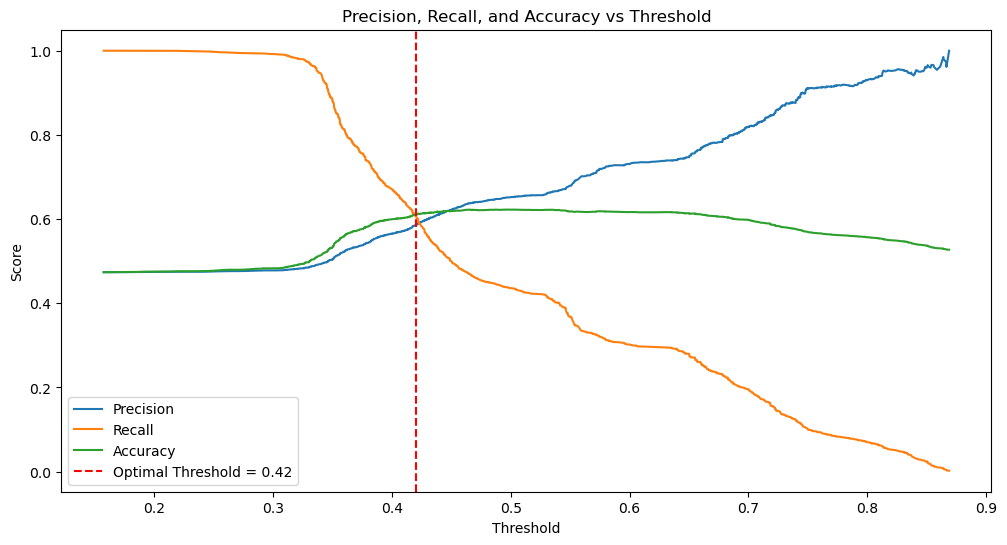

In [293]:
from sklearn.metrics import precision_recall_curve, average_precision_score, f1_score

y_probs = final_model.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Calculate F1-score for each threshold
f1_scores = [f1_score(y_test, y_probs >= t) for t in thresholds]

optimal_threshold = 0.42

# Plot Precision, Recall, and Accuracy vs Threshold
plt.figure(figsize=(12, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, [np.sum((y_probs >= t) == y_test) / len(y_test) for t in thresholds], label='Accuracy')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision, Recall, and Accuracy vs Threshold')
plt.show()
#Red line is optimal threshold

In [294]:
from sklearn.metrics import precision_score, recall_score

y_pred_optimal_threshold = (y_probs >= optimal_threshold).astype(int)

# Evaluate the model with the optimal threshold
precision_optimal = precision_score(y_test, y_pred_optimal_threshold)
recall_optimal = recall_score(y_test, y_pred_optimal_threshold)
accuracy_optimal = accuracy_score(y_test, y_pred_optimal_threshold)

# Display evaluation metrics
print(f'Optimal Threshold: {optimal_threshold:.2f}')
print(f'Precision: {precision_optimal:.2f}')
print(f'Recall: {recall_optimal:.2f}')
print(f'Accuracy: {accuracy_optimal:.2f}')

Optimal Threshold: 0.42
Precision: 0.59
Recall: 0.61
Accuracy: 0.61


In [295]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
         # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

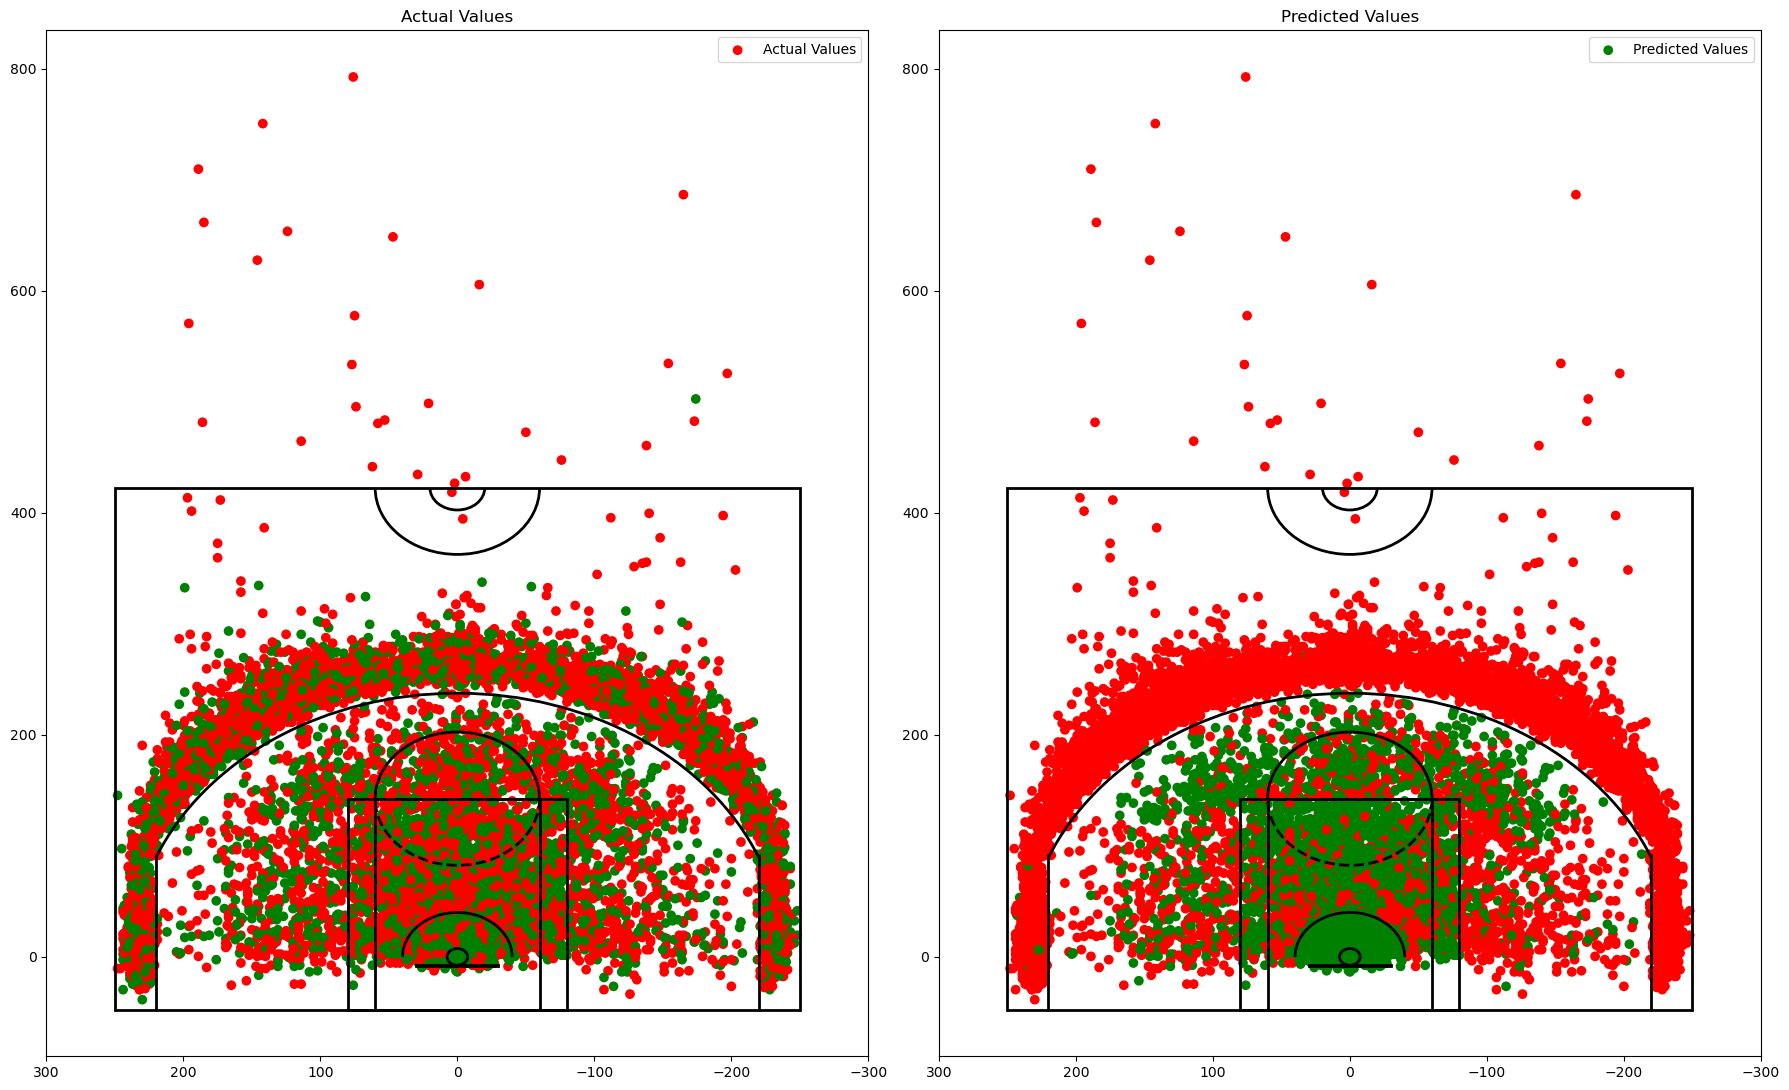

In [296]:
fig, axes = plt.subplots(1, 2, figsize=(18, 11))

# Plot Actual Values
col = np.where(y_test, 'g', 'r')
axes[0].scatter(X_test.LOC_X * 10, (X_test.LOC_Y-5)*10, c=col, label='Actual Values')
draw_court(outer_lines=True, ax=axes[0])  # Assuming draw_court accepts an ax parameter
axes[0].set_xlim(300, -300)
axes[0].set_title('Actual Values')
axes[0].legend()

# Plot Predicted Values
X_test['PREDICTION'] = y_pred_optimal_threshold
col = np.where(X_test["PREDICTION"], 'g', 'r')
axes[1].scatter(X_test.LOC_X * 10, (X_test.LOC_Y-5)*10, c=col, label='Predicted Values')
draw_court(outer_lines=True, ax=axes[1])  # Assuming draw_court accepts an ax parameter
axes[1].set_xlim(300, -300)
axes[1].set_title('Predicted Values')
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [277]:
X['SHOT_VALUE'] = np.where(X['SHOT_TYPE']=='3PT Field Goal', y * 3, y * 2)

C:\Users\tyler\AppData\Local\Temp\ipykernel_20868\3257058238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SHOT_VALUE'] = np.where(X['SHOT_TYPE']=='3PT Field Goal', y * 3, y * 2)


In [279]:
X_lin = X.iloc[:, :-1]
y_lin = X['SHOT_VALUE']

#We have almost 4,000,000 data points for early model we'll make the dataset smaller for quicker/easier training before train-test split
#new_X, X_trash, new_y, y_trash = train_test_split(X_lin, y_lin, test_size=0.975, random_state=42)
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

In [280]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression(n_jobs=-1))])


# Fit the model to the training data
model.fit(X_train_lin, y_train_lin)

# Make predictions on the test data
y_pred_lin = model.predict(X_test_lin)

# Evaluate the model
mse = mean_squared_error(y_test_lin, y_pred_lin)
r2 = r2_score(y_test_lin, y_pred_lin)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1.35
R-squared: 0.05


In [281]:
lasso_model = Lasso()

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', lasso_model)])


# Set up a parameter grid for grid search
param_grid = {
    'regressor__alpha': [0.01, 0.1, 1.0, 10.0]  # Add more values as needed
}

# Create a grid search object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train_lin, y_train_lin)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

lasso_coefficients = best_model.named_steps['regressor'].coef_
print(f'Lasso Coefficients: {lasso_coefficients}')

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_lin)

# Evaluate the best model
mse = mean_squared_error(y_test_lin, y_pred)
r2 = r2_score(y_test_lin, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Best Parameters: {'regressor__alpha': 0.01}
Best Negative Mean Squared Error: -1.3701518450846215
Lasso Coefficients: [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -1.66818466e-01  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -9.45283239e-02
  6.75704873e-12  0.00000000e+00 -0.0

In [282]:
# Assuming 'preprocessor' is the first step in your pipeline
transformed_feature_names = preprocessor.get_feature_names_out(input_features=X_train_lin.columns)
coefficients_df = pd.DataFrame({'Feature': transformed_feature_names, 'Coefficient': lasso_coefficients})
#Selected variables
coefficients_df[coefficients_df['Coefficient'] != 0]

,Feature,Coefficient
14,cat__ACTION_TYPE_Driving Layup Shot,-1.668185e-01
51,cat__SHOT_TYPE_2PT Field Goal,-9.452832e-02
52,cat__SHOT_TYPE_3PT Field Goal,6.757049e-12
55,cat__BASIC_ZONE_In The Paint (Non-RA),-1.503187e-02
57,cat__BASIC_ZONE_Mid-Range,-4.160106e-02
58,cat__BASIC_ZONE_Restricted Area,3.864299e-01
